In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [73]:
import pickle
with open('spectra_age_norm_nn.pickle', 'rb') as f:
    specs, spec_stds, freq, ages = pickle.load(f)
    
def pprint_EEGspec(which):
    sex = "Male" if which[2]==1 else "Female"
    return which[0]+which[1]+" "+ sex

def unpprint_EEGspec(pretty):
    sex = 1 if "Male" in pretty else 0
    return (pretty[0], pretty.split(" ")[0][1:], sex)

# which = ('C', 'W', 1)
def display_EEGspec(which):
    X = specs[which]
    Y = spec_stds[which]
    df = pd.DataFrame(X.T)
    df.columns = np.around(ages,3)
    pp = pprint_EEGspec(which)
    
    ax1 = sns.heatmap(df, xticklabels=100, yticklabels=False,cbar= False, cmap="Spectral_r")
    ax1.set(xlabel="age",ylabel="freq",title=pp)
    queried_age = 22
    idx = np.searchsorted(ages, queried_age)
    ax1.axvline(idx,0,1)
    plt.show()
    
    std = Y[idx]
    val = X[idx]
    ax2 = sns.lineplot(val,c='k', label="µ")

    cols = ["r", "g", "b"]
    for i in range(3):
        dev = (i + 1)*std
        sns.lineplot(val+dev,c=cols[i], label=f"+/-{i+1}σ")
        sns.lineplot(val-dev,c=cols[i])

    ax2.set(xlabel="freq",ylabel="power",title=pp+" age: " +str(queried_age))
    plt.show()

In [74]:
import pickle 
bp_type = 'relative'
with open(f'bandpowers_age_norm_{bp_type}.pickle', 'rb') as f:
    bp_info = pickle.load(f)

def pprint_bandpower(which):
    return which[0]+which[1] +" "+ which[2]

# which = ('W','M','alpha_rels')
def display_bandpower(which):
    try:
        X = bp_info[which]

        ages = np.around(X[0]["age"],3)
        queried_age = 22
        idx = np.searchsorted(ages, queried_age)
        pp = pprint_bandpower(which)

        for col in X[0].columns: 
            if "%" in col:
                ax = sns.lineplot(X[0][col],c='k',label=col)
        plt.axvline(idx,0,1)
        ax.set(xlabel="age",ylabel="power",title=pp)
        plt.xticks(ticks=np.arange(0,len(ages),step=200), labels=ages[::200])
        plt.show()
    except:
        print(which, "missing age column")

In [75]:
import pickle
suffix = '_frontal' # or ''
with open(f'spindle_age_norm{suffix}.pickle', 'rb') as f:
    sp_info = pickle.load(f)
    
def pprint_spindlefeatures(which):
    return which[0]+" "+which[1]

# which = ('M','spindle_freq')
# for which in sp_info:
def display_spindlefeatures(which):
    if which[1] != "spindle_amplitude":
        X = sp_info[which]

    ages = np.around(X[0]["age"],3)
    queried_age = 22
    idx = np.searchsorted(ages, queried_age)
    pp = pprint_spindlefeatures(which)

    for col in X[0].columns:
        if "%" in col:
            ax = sns.lineplot(X[0][col], c='k',label=col)
    plt.axvline(idx,0,1)
    ax.set(xlabel="age",ylabel="",title=pp)
    plt.xticks(ticks=np.arange(0,len(ages),step=200), labels=ages[::200])
    plt.show()

In [76]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

In [85]:
def interact_fn(query_age):
    print(f"query age {query_age}")

interact(interact_fn,query_age=22)

interactive(children=(IntSlider(value=100, description='query_age', max=300, min=-100), Output()), _dom_classe…

<function __main__.interact_fn(query_age)>

In [78]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="sepal_length")
fig

Dropdown(description='Task:', options=('CW Male', 'CW Female', 'OW Male', 'OW Female', 'CR Male', 'CR Female',…

Output()

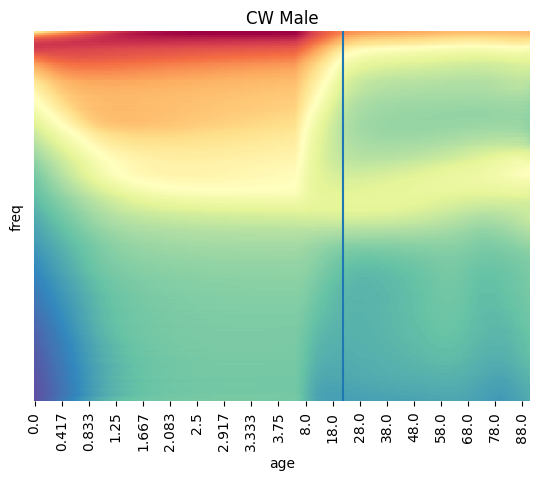

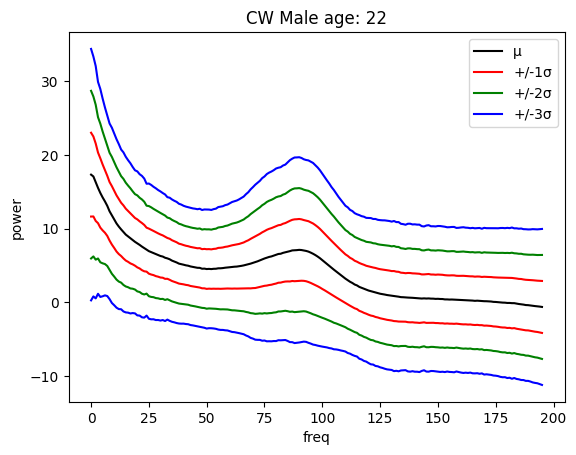

In [81]:
from IPython.display import display

dropper = widgets.Dropdown(options=[pprint_EEGspec(k) for k in specs.keys()],value='CW Male',description='Task:')
out = widgets.Output()
display(dropper, out)

display_EEGspec(unpprint_EEGspec(dropper.value))

def on_value_change(change):
    with out:
        print(change['new'])
        plt.clf()
        display_EEGspec(unpprint_EEGspec(dropper.value))

dropper.observe(on_value_change, names='value')